In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [2]:
tf.__version__

'2.1.0'

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv("Customer_Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X= data.drop(labels=["RowNumber","CustomerId","Surname"],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [7]:
y =data["Exited"]

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder  #LAbelEncode,OneHotEncode(pd.getdummies)

In [10]:
lab= LabelEncoder()

In [11]:
X["Geography"]=lab.fit_transform(X["Geography"])

In [12]:
X["Geography"].head(20)

0     0
1     2
2     0
3     0
4     2
5     2
6     0
7     1
8     0
9     0
10    0
11    2
12    0
13    0
14    2
15    1
16    1
17    2
18    2
19    0
Name: Geography, dtype: int32

In [13]:
X["Gender"]= lab.fit_transform(X["Gender"])

In [14]:
X["Gender"].head(20)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    1
17    0
18    1
19    0
Name: Gender, dtype: int32

# FEATURE STANDARDIZATION

In [15]:
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [17]:
X_train

array([[ 0.16958176,  1.51919821, -1.09168714, ..., -1.03227043,
         1.10643166, -0.50624244],
       [-2.30455945,  0.3131264 ,  0.91601335, ...,  0.9687384 ,
        -0.74866447, -0.50624244],
       [-1.19119591, -0.89294542, -1.09168714, ..., -1.03227043,
         1.48533467, -0.50624244],
       ...,
       [ 0.9015152 , -0.89294542,  0.91601335, ..., -1.03227043,
         1.41231994, -0.50624244],
       [-0.62420521,  1.51919821, -1.09168714, ...,  0.9687384 ,
         0.84432121, -0.50624244],
       [-0.28401079,  0.3131264 , -1.09168714, ..., -1.03227043,
         0.32472465,  1.97533814]])

# BUILD AN ANN

In [37]:
model= Sequential()
model.add(Dense(X.shape[1],activation="relu",input_dim=X.shape[1]))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [38]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [69]:
histor=model.fit(X_train,y_train.to_numpy(),batch_size=10,epochs=10,verbose=1,validation_split=0.2) #verbose gives the training visualization of our model

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 2s 351us/sample - loss: 3.4005e-07 - accuracy: 1.0000 - val_loss: 4.2342e-07 - val_accuracy: 1.0000
Epoch 2/10
6400/6400 [==============================] - 2s 340us/sample - loss: 2.3646e-07 - accuracy: 1.0000 - val_loss: 3.2668e-07 - val_accuracy: 1.0000
Epoch 3/10
6400/6400 [==============================] - 2s 318us/sample - loss: 1.6573e-07 - accuracy: 1.0000 - val_loss: 2.5124e-07 - val_accuracy: 1.0000
Epoch 4/10
6400/6400 [==============================] - 2s 333us/sample - loss: 1.1838e-07 - accuracy: 1.0000 - val_loss: 1.8311e-07 - val_accuracy: 1.0000
Epoch 5/10
6400/6400 [==============================] - 2s 342us/sample - loss: 8.2243e-08 - accuracy: 1.0000 - val_loss: 1.2891e-07 - val_accuracy: 1.0000
Epoch 6/10
6400/6400 [==============================] - 2s 332us/sample - loss: 5.8348e-08 - accuracy: 1.0000 - val_loss: 9.5919e-08 - val_accuracy: 1.0000
Epoch 7/10
6400/

In [70]:
pred= model.predict_classes(X_test)

In [71]:
pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [72]:
pred[0]

array([0])

In [73]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [74]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 68us/sample - loss: 6.3497e-08 - accuracy: 1.0000


[6.349748795844712e-08, 1.0]

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [76]:
cm= confusion_matrix

In [95]:
mat=cm(y_test,pred)

In [78]:
accuracy_score(y_test,pred)*100

100.0

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 18,309
Trainable params: 18,309
Non-trainable params: 0
_________________________________________________________________


# PLOTTING LEARNING CURVE AND CONFUSION MATRIX

In [80]:
# pip install mlxtend


In [81]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [82]:
histor

In [83]:
import matplotlib.pyplot as plt

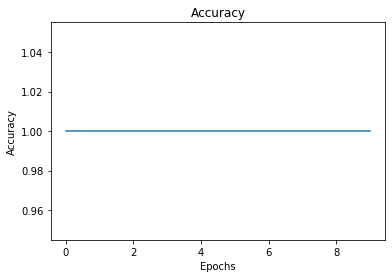

In [84]:
plt.plot(histor.history["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

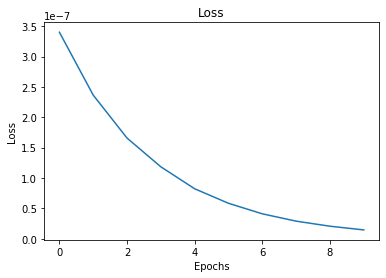

In [85]:
plt.plot(histor.history["loss"])
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [89]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

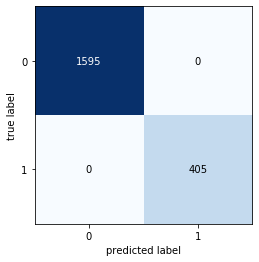

In [96]:
pcm= plot_confusion_matrix(conf_mat=mat,class_names=class_names)